# _ DADO UMA MESMA FAIXA DE RENDA: COMO O NÍVEL DE ESCOLARIDADE INFLUENCIA NO INDIVÍDUO O INTERESSE A MANTER-SE CONECTADO?_

__Bibliotecas importadas:__

In [281]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
from math import *
from scipy import stats

__Checando o diretório:__

In [282]:
import os
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
/home/pedro/Documents/Insper/2DP/Dados/Projeto 1/DS18/PNAD 2011


__Lendo o arquivo PES:__

In [283]:
dados = pd.read_csv('../../Excels/PNAD2011/PES2011.csv')

In [284]:
dados2 = pd.read_csv('../../Excels/PNAD2015/PES2015.csv')

__Selecionando colunas:__

In [285]:
dados = dados.loc[:, ['V9532', 'V4801', 'V06111', 'V06112']]
dados.tail()

,V9532,V4801,V06111,V06112
358914,NaN,15.0,NaN,NaN
358915,7000.0,NaN,1.0,1.0
358916,3500.0,NaN,1.0,1.0
358917,NaN,22.0,1.0,1.0
358918,NaN,13.0,NaN,NaN


In [286]:
dados2 = dados2.loc[:, ['V9532', 'V4801', 'V06111', 'V06112']]
dados2.tail()

,V9532,V4801,V06111,V06112
356899,900.0,NaN,1.0,1.0
356900,NaN,NaN,1.0,1.0
356901,300.0,22.0,1.0,1.0
356902,NaN,22.0,1.0,1.0
356903,NaN,12.0,NaN,NaN


__Removendo outliers da coluna Renda__

In [287]:
dados.V9532.loc[(dados.V9532 >= 50000)] = 0

In [288]:
dados2.V9532.loc[(dados2.V9532 >= 50000)] = 0

#  __Para escolaridade:__

__Escolaridade é a variável categórica ordinal com maior número de categorias. 
Várias células serão utilizadas em sequência para determinar os valores de cada linha.__

In [289]:
dados.V4801.loc[(dados.V4801 == 1) | (dados.V4801 == 2)] = 1#'Em alfabetização'

In [290]:
dados.V4801.loc[(dados.V4801 == 3) | (dados.V4801 == 21)] = 2#'Jovens e Adultos em alfabetização ou cursando Ensino Fundamental'

In [291]:
dados.V4801.loc[(dados.V4801 == 23)] = 3#'Jovens e Adultos cursando Ensino Médio'

In [292]:
dados.V4801.loc[(dados.V4801 == 4) | (dados.V4801 == 5) | (dados.V4801 == 6) | (dados.V4801 == 7) | (dados.V4801 == 12) | (dados.V4801 == 13) | (dados.V4801 == 14) | (dados.V4801 == 15)] = 4#'Ensino Fundamental I em tempo regular'

In [293]:
dados.V4801.loc[(dados.V4801 == 8) | (dados.V4801 == 9) | (dados.V4801 == 10) | (dados.V4801 == 11) | (dados.V4801 == 16) | (dados.V4801 == 17) | (dados.V4801 == 18) | (dados.V4801 == 19) | (dados.V4801 == 20)] = 5#'Ensino Fundamental I em tempo regular'

In [294]:
dados.V4801.loc[(dados.V4801 == 22)] = 6#'Ensino Médio em tempo regular'

In [295]:
dados.V4801.loc[(dados.V4801 == 24)] = 7#'Pré-Vestibulando'

In [296]:
dados.V4801.loc[(dados.V4801 == 25)] = 8#'Ensino Superior, Mestrando ou Doutorando'

## Agora para 2015:

In [297]:
dados2.V4801.loc[(dados2.V4801 == 1) | (dados2.V4801 == 2)] = 1#'Em alfabetização'

In [298]:
dados2.V4801.loc[(dados2.V4801 == 3) | (dados2.V4801 == 21)] = 2#'Jovens e Adultos em alfabetização ou cursando Ensino Fundamental'

In [299]:
dados2.V4801.loc[(dados2.V4801 == 23)] = 3#'Jovens e Adultos cursando Ensino Médio'

In [300]:
dados2.V4801.loc[(dados2.V4801 == 4) | (dados2.V4801 == 5) | (dados2.V4801 == 6) | (dados2.V4801 == 7) | (dados2.V4801 == 12) | (dados2.V4801 == 13) | (dados2.V4801 == 14) | (dados2.V4801 == 15)] = 4#'Ensino Fundamental I em tempo regular'

In [301]:
dados2.V4801.loc[(dados2.V4801 == 8) | (dados2.V4801 == 9) | (dados2.V4801 == 10) | (dados2.V4801 == 11) | (dados2.V4801 == 16) | (dados2.V4801 == 17) | (dados2.V4801 == 18) | (dados2.V4801 == 19) | (dados2.V4801 == 20)] = 5#'Ensino Fundamental I em tempo regular'

In [302]:
dados2.V4801.loc[(dados2.V4801 == 22)] = 6#'Ensino Médio em tempo regular'

In [303]:
dados2.V4801.loc[(dados2.V4801 == 24)] = 7#'Pré-Vestibulando'

In [304]:
dados2.V4801.loc[(dados2.V4801 == 25)] = 8#'Ensino Superior, Mestrando ou Doutorando'

__Tratando NaN usando o método__ `.fillna()`

In [305]:
dados.V4801 = dados.V4801.fillna(value = 10)#'Não Informado')
dados2.V4801 = dados2.V4801.fillna(value = 10)#'Não Informado')

__Checando resultados:__

In [306]:
dados.head()

,V9532,V4801,V06111,V06112
0,0.0,10.0,3.0,1.0
1,NaN,8.0,1.0,1.0
2,NaN,6.0,1.0,3.0
3,NaN,4.0,NaN,NaN
4,2800.0,10.0,3.0,1.0


In [307]:
dados2.head()

,V9532,V4801,V06111,V06112
0,800.0,10.0,1.0,1.0
1,1150.0,10.0,1.0,1.0
2,880.0,8.0,1.0,1.0
3,3000.0,10.0,1.0,1.0
4,NaN,5.0,1.0,1.0


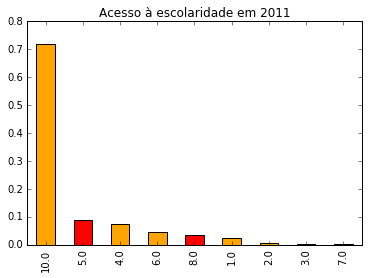

In [308]:
a = dados.V4801.value_counts(normalize = 1)
a.plot(kind='bar', color=('orange', 'red'), legend=False)
plt.title("Acesso à escolaridade em 2011")

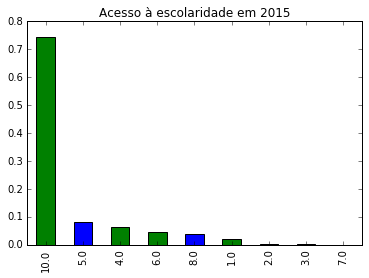

In [309]:
b = dados2.V4801.value_counts(normalize = 1)
b.plot(kind='bar', color=('green', 'blue'), legend=False)
plt.title("Acesso à escolaridade em 2015")

# __Para Internet__:

__Reapropriando valores categóricos:__

In [310]:
dados.V06111.loc[(dados.V06111 == 1)] = 'Sim'
dados.V06111.loc[(dados.V06111 == 3)] = 'Não'

/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


__Agora para 2015__

In [311]:
dados2.V06111.loc[(dados2.V06111 == 1)] = 'Sim'
dados2.V06111.loc[(dados2.V06111 == 3)] = 'Não'

/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


__Tratando NaN usando o método__ `.fillna()`

In [312]:
dados.V06111 = dados.V06111.fillna(value = 'Não Informado')

In [313]:
dados2.V06111 = dados2.V06111.fillna(value = 'Não Informado')

__Checando resultados:__

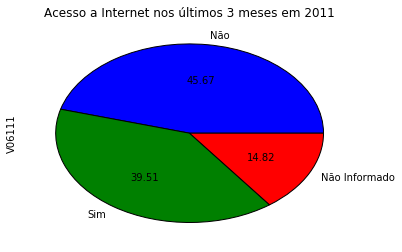

In [314]:
c = dados.V06111.value_counts(normalize = 1)
c.plot(kind='pie', autopct="%0.2f")
plt.title('Acesso a Internet nos últimos 3 meses em 2011')

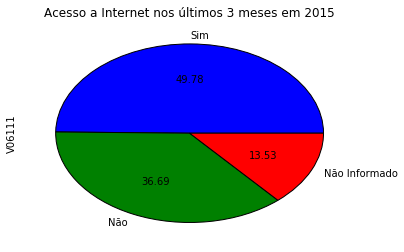

In [315]:
d = dados2.V06111.value_counts(normalize = 1)
d.plot(kind='pie', autopct="%0.2f")
plt.grid()
plt.title('Acesso a Internet nos últimos 3 meses em 2015')

# __Para celular pessoal:__

__Atribuindo valores categóricos:__

In [316]:
dados.V06112.loc[(dados.V06112 == 1)] = 1#'Sim'
dados.V06112.loc[(dados.V06112 == 3)] = 0#'Não'

/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [317]:
dados2.V06112.loc[(dados2.V06112 == 1)] = 1#'Sim'
dados2.V06112.loc[(dados2.V06112 == 3)] = 0#'Não'

/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


__Tratando NaN usando o método__ `.fillna()`

In [318]:
dados.V06112 = dados.V06112.fillna(value = 2)#'Não Informado')

In [319]:
dados2.V06112 = dados2.V06112.fillna(value = 3)#'Não Informado')

__Checando a base de dados para Celular em 2011:__

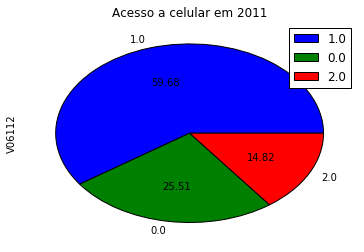

In [320]:
e = dados.V06112.value_counts(normalize = 1)
e.plot(kind='pie',  legend=True, autopct="%0.2f")
plt.title("Acesso a celular em 2011")

__Agora para 2015:__

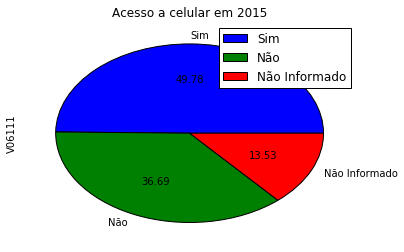

In [321]:
f = dados2.V06111.value_counts(normalize = 1)
f.plot(kind='pie',  legend=True, autopct="%0.2f")
plt.title("Acesso a celular em 2015")

# Renomeando colunas:

In [322]:
dados.columns = ['Renda11', 'Escolaridade11', 'Internet11', 'Celular11']

In [323]:
dados2.columns = ['Renda15', 'Escolaridade15', 'Internet15', 'Celular15']

# __Para Renda:__

In [324]:
dados.Renda11.describe()

count    157339.000000
mean       1233.785705
std        1836.310814
min           0.000000
25%         545.000000
50%         750.000000
75%        1200.000000
max       45000.000000
Name: Renda11, dtype: float64

##### Máximo e máximo valor está explícito pelo describe()

Tomando uso do `.fillna`

In [325]:
dados.Renda11.fillna(value = 'Não Informado')
print('')

In [326]:
dados2.Renda15.fillna(value = 'Não Informado')
print('')

__Usando__ `boxplot` __e__ `histograma` __para checar a base de dados em 2011, depois para 2015:__

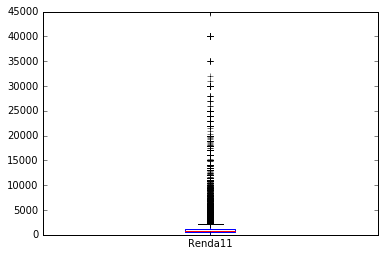

In [327]:
dados.Renda11.plot.box()

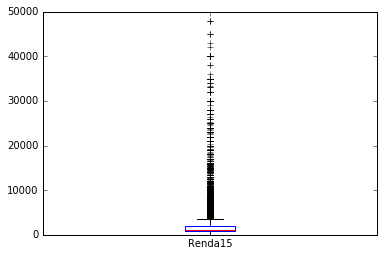

In [328]:
dados2.Renda15.plot.box()

### Vamos subdividir o grupo de renda em grupos menores usando o método `loc`

In [329]:
faixa1 = np.arange(0, 1000, 50)
grupo1_renda11 = dados.Renda11.loc[(dados.Renda11 > 1) & (dados.Renda11 < 1000)]
grupo1_renda15 = dados2.Renda15.loc[(dados2.Renda15 > 1) & (dados2.Renda15 < 1000)]

In [330]:
faixa2 = np.arange(1000, 2000, 50)
grupo2_renda11 = dados.Renda11.loc[(dados.Renda11 > 1000) & (dados.Renda11 <= 2000)]
grupo2_renda15 = dados2.Renda15.loc[(dados2.Renda15 > 1000) & (dados2.Renda15 <= 2000)]

In [331]:
faixa3 = np.arange(2000, 3000, 50)
grupo3_renda11 = dados.Renda11.loc[(dados.Renda11 > 2000) & (dados.Renda11 <= 3000)]
grupo3_renda15 = dados2.Renda15.loc[(dados2.Renda15 > 2000) & (dados2.Renda15 <= 3000)]

In [332]:
faixa4 = np.arange(3000, 4000, 50)
grupo4_renda11 = dados.Renda11.loc[(dados.Renda11 > 3000) & (dados.Renda11 <= 4000)]
grupo4_renda15 = dados2.Renda15.loc[(dados2.Renda15 > 3000) & (dados2.Renda15 <= 4000)]

In [333]:
faixa5 = np.arange(4000, 5000, 50)
grupo5_renda11 = dados.Renda11.loc[(dados.Renda11 > 4000) & (dados.Renda11 <= 5000)]
grupo5_renda15 = dados2.Renda15.loc[(dados2.Renda15 > 4000) & (dados2.Renda15 <= 5000)]

In [334]:
faixa6 = np.arange(5000, 6000, 50)
grupo6_renda11 = dados.Renda11.loc[(dados.Renda11 > 5000) & (dados.Renda11 <= 6000)]
grupo6_renda15 = dados2.Renda15.loc[(dados2.Renda15 > 5000) & (dados2.Renda15 <= 6000)]

In [335]:
faixa7 = np.arange(6000, 7000, 50)
grupo7_renda11 = dados.Renda11.loc[(dados.Renda11 > 6000) & (dados.Renda11 <= 7000)]
grupo7_renda15 = dados2.Renda15.loc[(dados2.Renda15 > 6000) & (dados2.Renda15 <= 7000)]

In [336]:
faixa8 = np.arange(7000, 8000, 50)
grupo8_renda11 = dados.Renda11.loc[(dados.Renda11 > 7000) & (dados.Renda11 <= 8000)]
grupo8_renda15 = dados2.Renda15.loc[(dados2.Renda15 > 7000) & (dados2.Renda15 <= 8000)]

In [337]:
faixa9 = np.arange(8000, 9000, 50)
grupo9_renda11 = dados.Renda11.loc[(dados.Renda11 > 8000) & (dados.Renda11 <= 9000)]
grupo9_renda15 = dados2.Renda15.loc[(dados2.Renda15 > 8000) & (dados2.Renda15 <= 9000)]

In [338]:
faixa10 = np.arange(9000, 10000, 50)
grupo10_renda11 = dados.Renda11.loc[(dados.Renda11 > 9000) & (dados.Renda11 <= 10000)]
grupo10_renda15 = dados2.Renda15.loc[(dados2.Renda15 > 9000) & (dados2.Renda15 <= 10000)]

In [339]:
faixaL = np.arange(10000, 30000, 500)
grupoL_renda11 = dados.Renda11.loc[(dados.Renda11 > 10000) & (dados.Renda11 <= 30000)]
grupoL_renda15 = dados2.Renda15.loc[(dados2.Renda15 > 10000) & (dados2.Renda15 <= 30000)]

# Criando faixas com `qcut` para cada grupo de renda:

In [340]:
def qcut (t, fx):
    transformacao = pd.cut(t, bins=np.r_[fx, np.inf], right=False)
    return transformacao

In [341]:
um_renda11 = qcut(grupo1_renda11, faixa1)
um_renda15 = qcut(grupo1_renda15, faixa1)

In [342]:
dois_renda11 = qcut(grupo2_renda11, faixa2)
dois_renda15 = qcut(grupo2_renda15, faixa2)

In [343]:
tres_renda11 = qcut(grupo3_renda11, faixa3)
tres_renda15 = qcut(grupo3_renda15, faixa3)

In [344]:
quatro_renda11 = qcut(grupo4_renda11, faixa4)
quatro_renda15 = qcut(grupo4_renda15, faixa4)

In [345]:
cinco_renda11 = qcut(grupo5_renda11, faixa5)
cinco_renda15 = qcut(grupo5_renda15, faixa5)

In [346]:
seis_renda11 = qcut(grupo6_renda11, faixa6)
seis_renda15 = qcut(grupo6_renda15, faixa6)

In [347]:
sete_renda11 = qcut(grupo7_renda15, faixa7)
sete_renda15 = qcut(grupo7_renda15, faixa7)

In [348]:
oito_renda11 = qcut(grupo8_renda11, faixa8)
oito_renda15 = qcut(grupo8_renda15, faixa8)

In [349]:
nove_renda11 = qcut(grupo9_renda11, faixa9)
nove_renda15 = qcut(grupo9_renda15, faixa9)

In [350]:
dez_renda11 = qcut(grupo10_renda11, faixa10)
dez_renda15 = qcut(grupo10_renda15, faixa10)

In [351]:
large_renda11 = qcut(grupoL_renda11, faixaL)
large_renda15 = qcut(grupoL_renda11, faixaL)

# Exibição de cada grupo de renda:

Grupo 1:

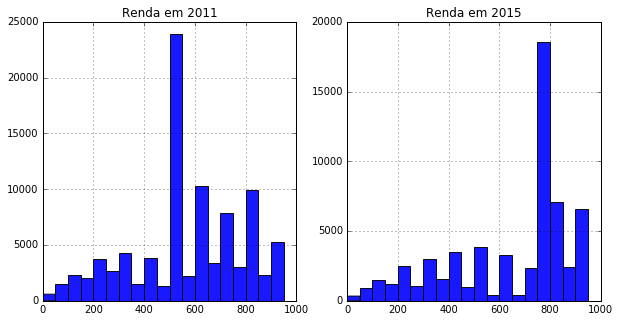

In [352]:
plt.figure(figsize = (10, 5))

plt.subplot(121)
plt.hist(grupo1_renda11, bins=faixa1, alpha=0.9)
plt.title("Renda em 2011")
plt.grid()

plt.subplot(122)
plt.hist(grupo1_renda15, bins=faixa1, alpha=0.9)
plt.title("Renda em 2015")
plt.grid()

plt.show()

Grupo 2:

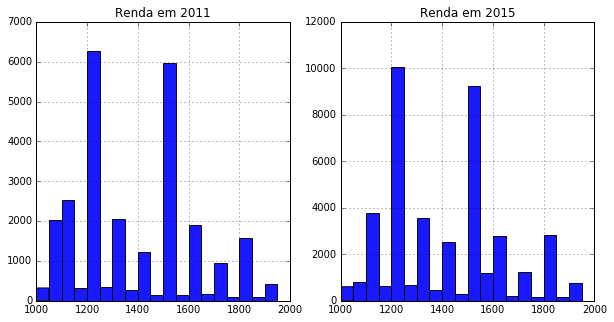

In [353]:
plt.figure(figsize = (10, 5))

plt.subplot(121)
plt.hist(grupo2_renda11, bins=faixa2, alpha=0.9)
plt.title("Renda em 2011")
plt.grid()

plt.subplot(122)
plt.hist(grupo2_renda15, bins=faixa2, alpha=0.9)
plt.title("Renda em 2015")
plt.grid()

plt.show()

Grupo 3:

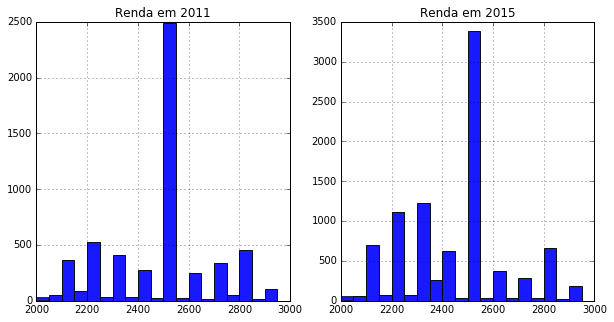

In [354]:
plt.figure(figsize = (10, 5))

plt.subplot(121)
plt.hist(grupo3_renda11, bins=faixa3, alpha=0.9)
plt.title("Renda em 2011")
plt.grid()

plt.subplot(122)
plt.hist(grupo3_renda15, bins=faixa3, alpha=0.9)
plt.title("Renda em 2015")
plt.grid()

plt.show()

Grupo 4:

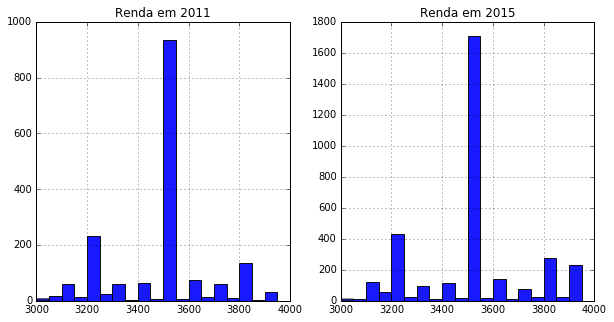

In [355]:
plt.figure(figsize = (10, 5))
plt.subplot(121)

plt.hist(grupo4_renda11, bins=faixa4, alpha=0.9)
plt.title("Renda em 2011")
plt.grid()
plt.subplot(122)

plt.hist(grupo4_renda15, bins=faixa4, alpha=0.9)
plt.title("Renda em 2015")
plt.grid()
plt.show()

Grupo 5:

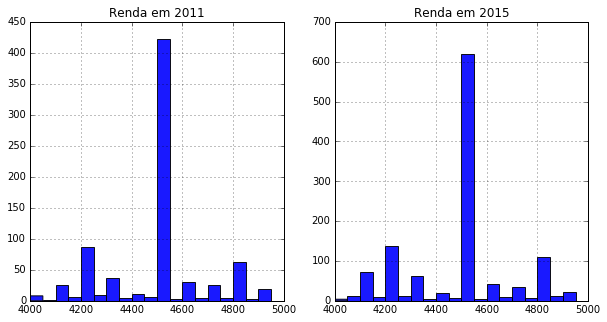

In [356]:
plt.figure(figsize = (10, 5))

plt.subplot(121)
plt.hist(grupo5_renda11, bins=faixa5, alpha=0.9)
plt.title("Renda em 2011")
plt.grid()

plt.subplot(122)
plt.hist(grupo5_renda15, bins=faixa5, alpha=0.9)
plt.title("Renda em 2015")
plt.grid()

plt.show()

Grupo 6:

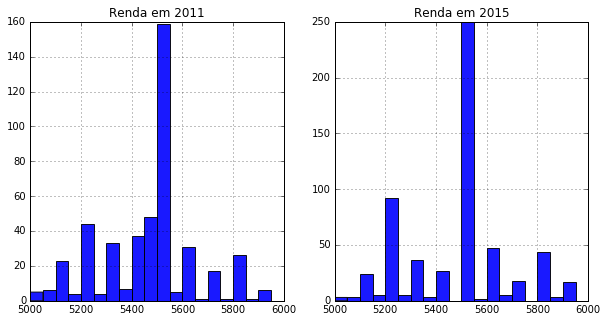

In [357]:
plt.figure(figsize = (10, 5))

plt.subplot(121)
plt.hist(grupo6_renda11, bins=faixa6, alpha=0.9)
plt.title("Renda em 2011")
plt.grid()

plt.subplot(122)
plt.hist(grupo6_renda15, bins=faixa6, alpha=0.9)
plt.title("Renda em 2015")
plt.grid()

plt.show()

Grupo 7:

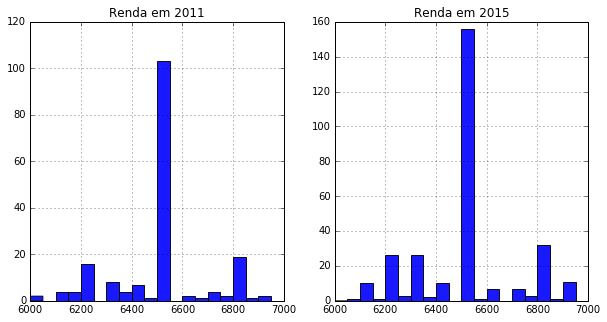

In [358]:
plt.figure(figsize = (10, 5))

plt.subplot(121)
plt.hist(grupo7_renda11, bins=faixa7, alpha=0.9)
plt.title("Renda em 2011")
plt.grid()

plt.subplot(122)
plt.hist(grupo7_renda15, bins=faixa7, alpha=0.9)
plt.title("Renda em 2015")
plt.grid()

plt.show()

Grupo 8:

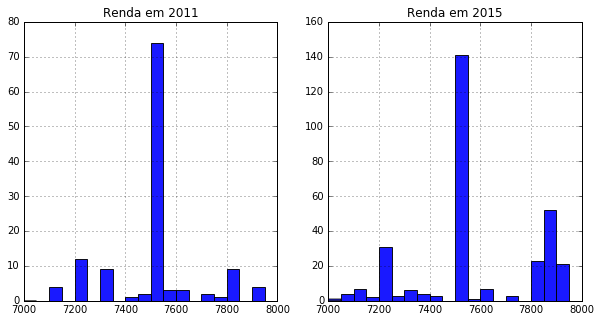

In [359]:
plt.figure(figsize = (10, 5))

plt.subplot(121)
plt.hist(grupo8_renda11, bins=faixa8, alpha=0.9)
plt.title("Renda em 2011")
plt.grid()

plt.subplot(122)
plt.hist(grupo8_renda15, bins=faixa8, alpha=0.9)
plt.title("Renda em 2015")
plt.grid()

plt.show()

Grupo 9:

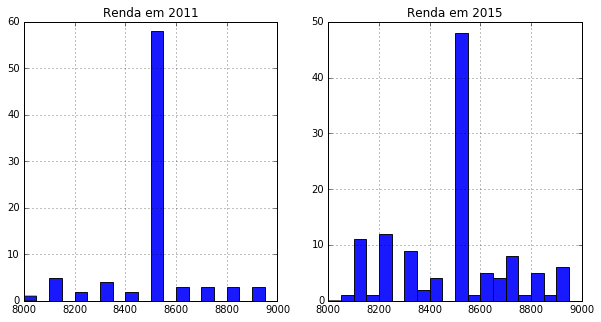

In [360]:
plt.figure(figsize = (10, 5))

plt.subplot(121)
plt.hist(grupo9_renda11, bins=faixa9, alpha=0.9)
plt.title("Renda em 2011")
plt.grid()

plt.subplot(122)
plt.hist(grupo9_renda15, bins=faixa9, alpha=0.9)
plt.title("Renda em 2015")
plt.grid()

plt.show()

Grupo 10:

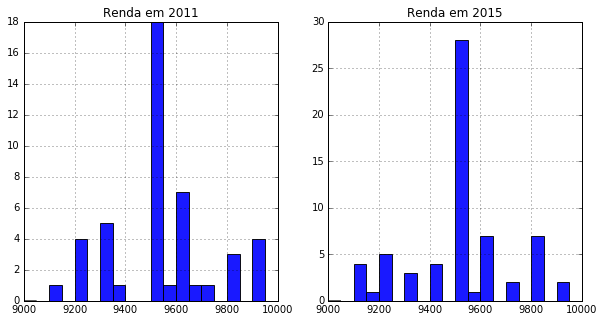

In [361]:
plt.figure(figsize = (10, 5))

plt.subplot(121)
plt.hist(grupo10_renda11, bins=faixa10, alpha=0.9)
plt.title("Renda em 2011")
plt.grid()

plt.subplot(122)
plt.hist(grupo10_renda15, bins=faixa10, alpha=0.9)
plt.title("Renda em 2015")
plt.grid()

plt.show()

Grupo Large:

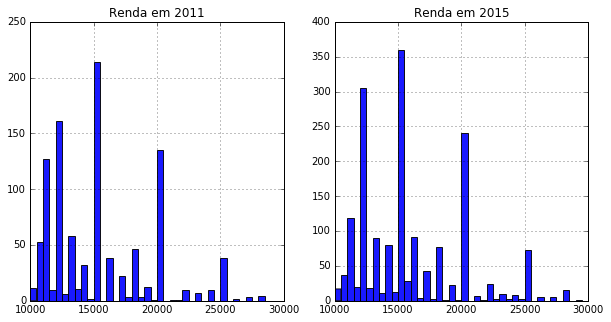

In [362]:
plt.figure(figsize = (10, 5))

plt.subplot(121)
plt.hist(grupoL_renda11, bins=faixaL, alpha=0.9)
plt.title("Renda em 2011")
plt.grid()

plt.subplot(122)
plt.hist(grupoL_renda15, bins=faixaL, alpha=0.9)
plt.title("Renda em 2015")
plt.grid()

plt.show()

# __ Realizando Crosstabs e iniciando o processo de análise do resultado: __

__Filtrando Celular e Internet de acordo com as faixas de renda__

In [363]:
filtro_celular_renda11 = dados.Celular11.loc[(dados.Renda11 < 5000)]
filtro_celular_renda15 = dados2.Celular15.loc[(dados2.Renda15 < 5000)]

In [364]:
filtro_internet_renda11 = dados.Internet11.loc[dados.Renda11 < 5000]
filtro_internet_renda15 = dados2.Internet15.loc[dados2.Renda15 < 5000]

In [365]:
filtro_escolaridade_renda11 = dados.Escolaridade11.loc[dados.Renda11 < 5000]
filtro_escolaridade_renda15 = dados2.Escolaridade15.loc[dados2.Renda15 < 5000]

Escolaridade com Internet:

In [366]:
escolaridade_internet11 = pd.crosstab(dados.Escolaridade11, dados.Internet11, normalize = True)*100
escolaridade_internet15 = pd.crosstab(dados2.Escolaridade15, dados2.Internet15, normalize = True)*100

Escolaridade com celular:

In [367]:
escolaridade_celular11 = pd.crosstab(dados.Escolaridade11, dados.Celular11, normalize = True)*100
escolaridade_celular15 = pd.crosstab(dados2.Escolaridade15, dados2.Celular15, normalize = True)*100

Renda com Escolaridade, separando para cada grupo:

In [368]:
renda1_escolaridade11 = pd.crosstab(um_renda11, dados.Escolaridade11)
renda1_escolaridade15 = pd.crosstab(um_renda15, dados2.Escolaridade15)

In [369]:
renda2_escolaridade11 = pd.crosstab(dois_renda11, dados.Escolaridade11)
renda2_escolaridade15 = pd.crosstab(dois_renda15, dados2.Escolaridade15)

In [370]:
renda3_escolaridade11 = pd.crosstab(tres_renda11, dados.Escolaridade11)
renda3_escolaridade15 = pd.crosstab(tres_renda15, dados2.Escolaridade15)

In [371]:
renda4_escolaridade11 = pd.crosstab(quatro_renda11, dados.Escolaridade11)
renda4_escolaridade15 = pd.crosstab(quatro_renda15, dados2.Escolaridade15)

In [372]:
renda5_escolaridade11 = pd.crosstab(cinco_renda11, dados.Escolaridade11)
renda5_escolaridade15 = pd.crosstab(cinco_renda15, dados2.Escolaridade15)

In [373]:
renda6_escolaridade11 = pd.crosstab(seis_renda11, dados.Escolaridade11)
renda6_escolaridade15 = pd.crosstab(seis_renda15, dados2.Escolaridade15)

In [374]:
renda7_escolaridade11 = pd.crosstab(sete_renda11, dados.Escolaridade11)
renda7_escolaridade15 = pd.crosstab(sete_renda15, dados2.Escolaridade15)

In [375]:
renda8_escolaridade11 = pd.crosstab(oito_renda11, dados.Escolaridade11)
renda8_escolaridade15 = pd.crosstab(oito_renda15, dados2.Escolaridade15)

In [376]:
renda9_escolaridade11 = pd.crosstab(nove_renda11, dados.Escolaridade11)
renda9_escolaridade15 = pd.crosstab(nove_renda15, dados2.Escolaridade15)

In [377]:
renda10_escolaridade11 = pd.crosstab(dez_renda11, dados.Escolaridade11)
renda10_escolaridade15 = pd.crosstab(dez_renda15, dados2.Escolaridade15)

In [378]:
rendaL_escolaridade11 = pd.crosstab(large_renda11, dados.Escolaridade11)
rendaL_escolaridade15 = pd.crosstab(large_renda15, dados2.Escolaridade15)

__Como é o perfil financeiro das amostras em 2011 e em 2015?__

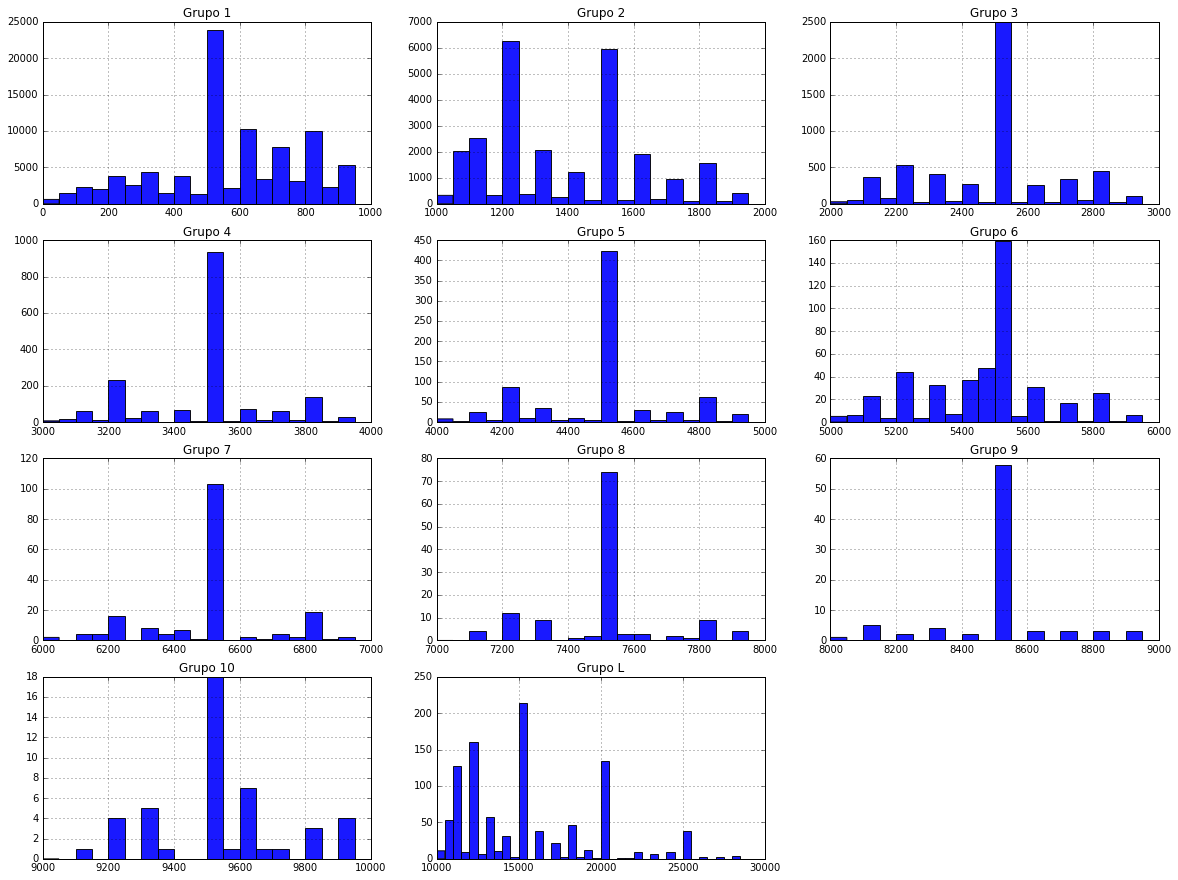

In [379]:
plt.figure(figsize = (20, 15))

plt.subplot(4,3,1)
plt.hist(grupo1_renda11, bins=faixa1, alpha=0.9)
plt.title("Grupo 1")
plt.grid()

plt.subplot(4,3,2)
plt.hist(grupo2_renda11, bins=faixa2, alpha=0.9)
plt.title("Grupo 2")
plt.grid()

plt.subplot(4,3,3)
plt.hist(grupo3_renda11, bins=faixa3, alpha=0.9)
plt.title("Grupo 3")
plt.grid()

plt.subplot(4,3,4)
plt.hist(grupo4_renda11, bins=faixa4, alpha=0.9)
plt.title("Grupo 4")
plt.grid()

plt.subplot(4,3,5)
plt.hist(grupo5_renda11, bins=faixa5, alpha=0.9)
plt.title("Grupo 5")
plt.grid()

plt.subplot(4,3,6)
plt.hist(grupo6_renda11, bins=faixa6, alpha=0.9)
plt.title("Grupo 6")
plt.grid()

plt.subplot(4,3,7)
plt.hist(grupo7_renda11, bins=faixa7, alpha=0.9)
plt.title("Grupo 7")
plt.grid()

plt.subplot(4,3,8)
plt.hist(grupo8_renda11, bins=faixa8, alpha=0.9)
plt.title("Grupo 8")
plt.grid()

plt.subplot(4,3,9)
plt.hist(grupo9_renda11, bins=faixa9, alpha=0.9)
plt.title("Grupo 9")
plt.grid()

plt.subplot(4,3,10)
plt.hist(grupo10_renda11, bins=faixa10, alpha=0.9)
plt.title("Grupo 10")
plt.grid()

plt.subplot(4,3,11)
plt.hist(grupoL_renda11, bins=faixaL, alpha=0.9)
plt.title("Grupo L")
plt.grid()

plt.show()

2.0        Axes(0.125,0.125;0.0824468x0.775)
3.0     Axes(0.223936,0.125;0.0824468x0.775)
4.0     Axes(0.322872,0.125;0.0824468x0.775)
5.0     Axes(0.421809,0.125;0.0824468x0.775)
6.0     Axes(0.520745,0.125;0.0824468x0.775)
7.0     Axes(0.619681,0.125;0.0824468x0.775)
8.0     Axes(0.718617,0.125;0.0824468x0.775)
10.0    Axes(0.817553,0.125;0.0824468x0.775)
dtype: object

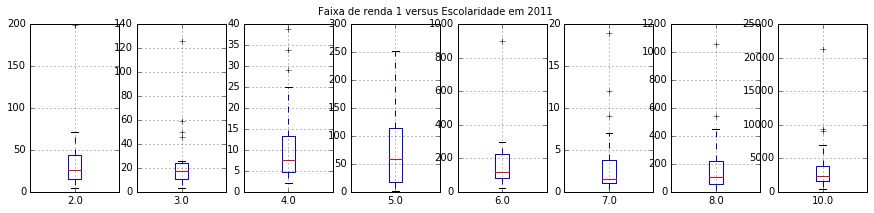

In [380]:
renda1_escolaridade11.plot(kind = 'box',subplots = True, legend = False, figsize = (15, 3), grid = True, title = "Faixa de renda 1 versus Escolaridade em 2011")

2.0        Axes(0.125,0.125;0.0824468x0.775)
3.0     Axes(0.223936,0.125;0.0824468x0.775)
4.0     Axes(0.322872,0.125;0.0824468x0.775)
5.0     Axes(0.421809,0.125;0.0824468x0.775)
6.0     Axes(0.520745,0.125;0.0824468x0.775)
7.0     Axes(0.619681,0.125;0.0824468x0.775)
8.0     Axes(0.718617,0.125;0.0824468x0.775)
10.0    Axes(0.817553,0.125;0.0824468x0.775)
dtype: object

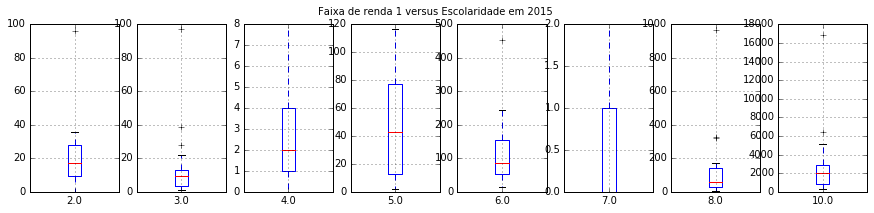

In [381]:
renda1_escolaridade15.plot(kind = 'box',subplots = True, legend = False, figsize = (15, 3), grid = True, title = "Faixa de renda 1 versus Escolaridade em 2015")

2.0        Axes(0.125,0.125;0.0824468x0.775)
3.0     Axes(0.223936,0.125;0.0824468x0.775)
4.0     Axes(0.322872,0.125;0.0824468x0.775)
5.0     Axes(0.421809,0.125;0.0824468x0.775)
6.0     Axes(0.520745,0.125;0.0824468x0.775)
7.0     Axes(0.619681,0.125;0.0824468x0.775)
8.0     Axes(0.718617,0.125;0.0824468x0.775)
10.0    Axes(0.817553,0.125;0.0824468x0.775)
dtype: object

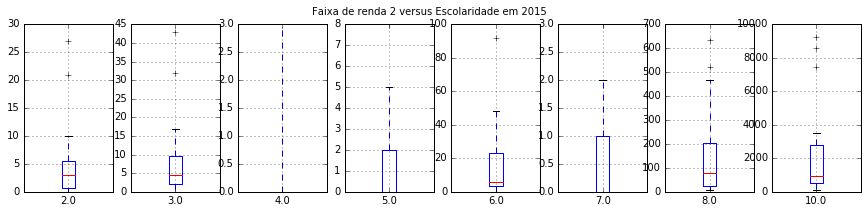

In [382]:
renda2_escolaridade15.plot(kind = 'box',subplots = True, legend = False, figsize = (15, 3), grid = True, title = "Faixa de renda 2 versus Escolaridade em 2015")

2.0        Axes(0.125,0.125;0.0824468x0.775)
3.0     Axes(0.223936,0.125;0.0824468x0.775)
4.0     Axes(0.322872,0.125;0.0824468x0.775)
5.0     Axes(0.421809,0.125;0.0824468x0.775)
6.0     Axes(0.520745,0.125;0.0824468x0.775)
7.0     Axes(0.619681,0.125;0.0824468x0.775)
8.0     Axes(0.718617,0.125;0.0824468x0.775)
10.0    Axes(0.817553,0.125;0.0824468x0.775)
dtype: object

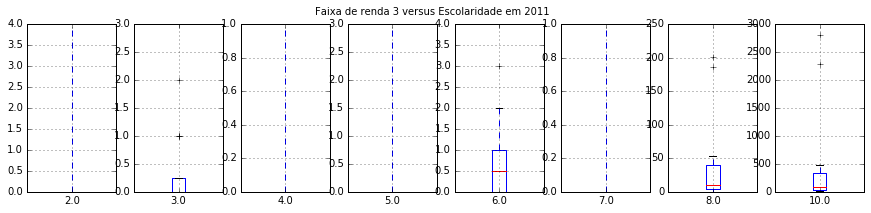

In [383]:
renda3_escolaridade11.plot(kind = 'box',subplots = True, legend = False, figsize = (15, 3), grid = True, title = "Faixa de renda 3 versus Escolaridade em 2011")

2.0        Axes(0.125,0.125;0.0945122x0.775)
3.0     Axes(0.238415,0.125;0.0945122x0.775)
5.0     Axes(0.351829,0.125;0.0945122x0.775)
6.0     Axes(0.465244,0.125;0.0945122x0.775)
7.0     Axes(0.578659,0.125;0.0945122x0.775)
8.0     Axes(0.692073,0.125;0.0945122x0.775)
10.0    Axes(0.805488,0.125;0.0945122x0.775)
dtype: object

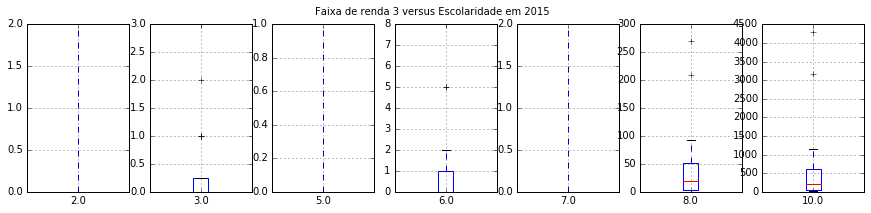

In [384]:
renda3_escolaridade15.plot(kind = 'box',subplots = True, legend = False, figsize = (15, 3), grid = True, title = "Faixa de renda 3 versus Escolaridade em 2015")

2.0        Axes(0.125,0.125;0.133621x0.775)
5.0     Axes(0.285345,0.125;0.133621x0.775)
6.0      Axes(0.44569,0.125;0.133621x0.775)
8.0     Axes(0.606034,0.125;0.133621x0.775)
10.0    Axes(0.766379,0.125;0.133621x0.775)
dtype: object

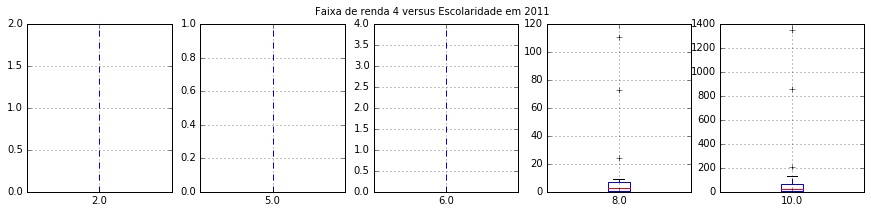

In [385]:
renda4_escolaridade11.plot(kind = 'box',subplots = True, legend = False, figsize = (15, 3), grid = True, title = "Faixa de renda 4 versus Escolaridade em 2011")

2.0        Axes(0.125,0.125;0.110714x0.775)
3.0     Axes(0.257857,0.125;0.110714x0.775)
5.0     Axes(0.390714,0.125;0.110714x0.775)
6.0     Axes(0.523571,0.125;0.110714x0.775)
8.0     Axes(0.656429,0.125;0.110714x0.775)
10.0    Axes(0.789286,0.125;0.110714x0.775)
dtype: object

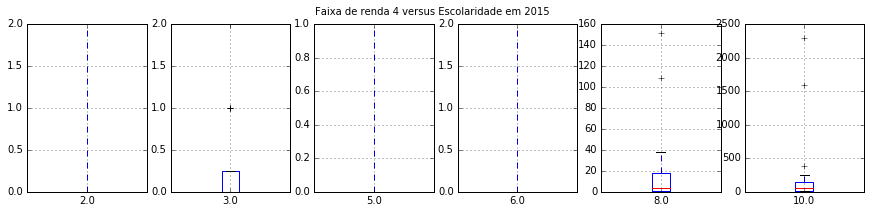

In [386]:
renda4_escolaridade15.plot(kind = 'box',subplots = True, legend = False, figsize = (15, 3), grid = True, title = "Faixa de renda 4 versus Escolaridade em 2015")

3.0        Axes(0.125,0.125;0.133621x0.775)
5.0     Axes(0.285345,0.125;0.133621x0.775)
6.0      Axes(0.44569,0.125;0.133621x0.775)
8.0     Axes(0.606034,0.125;0.133621x0.775)
10.0    Axes(0.766379,0.125;0.133621x0.775)
dtype: object

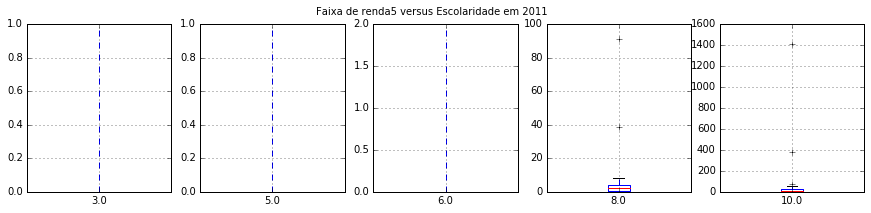

In [387]:
renda5_escolaridade11.plot(kind = 'box',subplots = True, legend = False, figsize = (15, 3), grid = True, title = "Faixa de renda5 versus Escolaridade em 2011")

2.0        Axes(0.125,0.125;0.110714x0.775)
3.0     Axes(0.257857,0.125;0.110714x0.775)
6.0     Axes(0.390714,0.125;0.110714x0.775)
7.0     Axes(0.523571,0.125;0.110714x0.775)
8.0     Axes(0.656429,0.125;0.110714x0.775)
10.0    Axes(0.789286,0.125;0.110714x0.775)
dtype: object

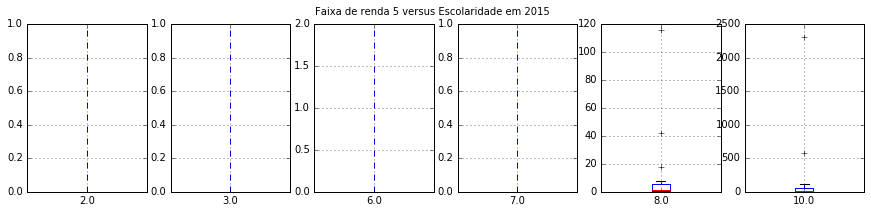

In [388]:
renda5_escolaridade15.plot(kind = 'box',subplots = True, legend = False, figsize = (15, 3), grid = True, title = "Faixa de renda 5 versus Escolaridade em 2015")

4.0        Axes(0.125,0.125;0.168478x0.775)
6.0     Axes(0.327174,0.125;0.168478x0.775)
8.0     Axes(0.529348,0.125;0.168478x0.775)
10.0    Axes(0.731522,0.125;0.168478x0.775)
dtype: object

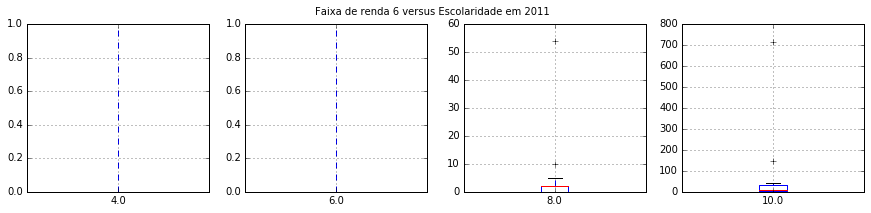

In [389]:
renda6_escolaridade11.plot(kind = 'box',subplots = True, legend = False, figsize = (15, 3), grid = True, title = "Faixa de renda 6 versus Escolaridade em 2011")

3.0        Axes(0.125,0.125;0.168478x0.775)
6.0     Axes(0.327174,0.125;0.168478x0.775)
8.0     Axes(0.529348,0.125;0.168478x0.775)
10.0    Axes(0.731522,0.125;0.168478x0.775)
dtype: object

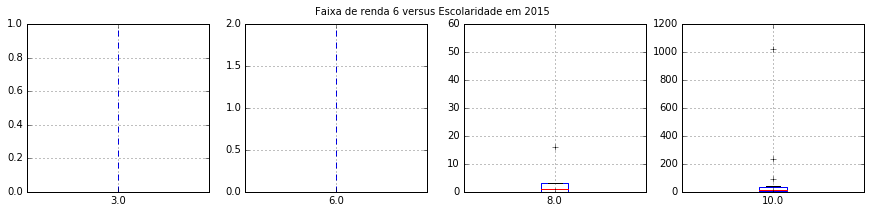

In [390]:
renda6_escolaridade15.plot(kind = 'box',subplots = True, legend = False, figsize = (15, 3), grid = True, title = "Faixa de renda 6 versus Escolaridade em 2015")

1.0        Axes(0.125,0.125;0.0731132x0.775)
2.0     Axes(0.212736,0.125;0.0731132x0.775)
3.0     Axes(0.300472,0.125;0.0731132x0.775)
4.0     Axes(0.388208,0.125;0.0731132x0.775)
5.0     Axes(0.475943,0.125;0.0731132x0.775)
6.0     Axes(0.563679,0.125;0.0731132x0.775)
7.0     Axes(0.651415,0.125;0.0731132x0.775)
8.0     Axes(0.739151,0.125;0.0731132x0.775)
10.0    Axes(0.826887,0.125;0.0731132x0.775)
dtype: object

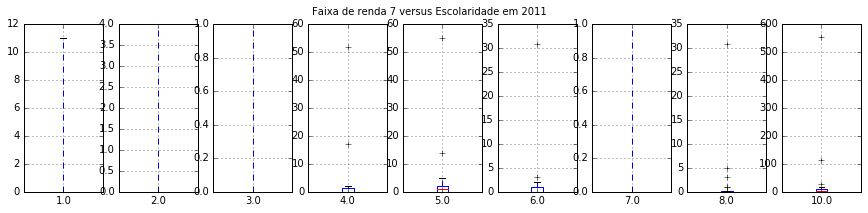

In [391]:
renda7_escolaridade11.plot(kind = 'box',subplots = True, legend = False, figsize = (15, 3), grid = True, title = "Faixa de renda 7 versus Escolaridade em 2011")

2.0        Axes(0.125,0.125;0.168478x0.775)
7.0     Axes(0.327174,0.125;0.168478x0.775)
8.0     Axes(0.529348,0.125;0.168478x0.775)
10.0    Axes(0.731522,0.125;0.168478x0.775)
dtype: object

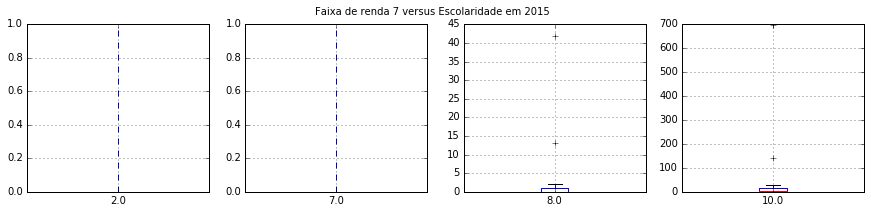

In [392]:
renda7_escolaridade15.plot(kind = 'box',subplots = True, legend = False, figsize = (15, 3), grid = True, title = "Faixa de renda 7 versus Escolaridade em 2015")

8.0        Axes(0.125,0.125;0.352273x0.775)
10.0    Axes(0.547727,0.125;0.352273x0.775)
dtype: object

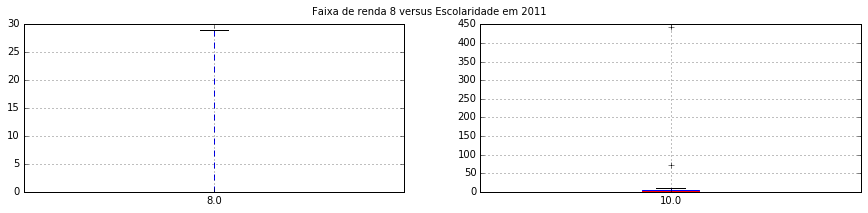

In [393]:
renda8_escolaridade11.plot(kind = 'box',subplots = True, legend = False, figsize = (15, 3), grid = True, title = "Faixa de renda 8 versus Escolaridade em 2011")

8.0        Axes(0.125,0.125;0.352273x0.775)
10.0    Axes(0.547727,0.125;0.352273x0.775)
dtype: object

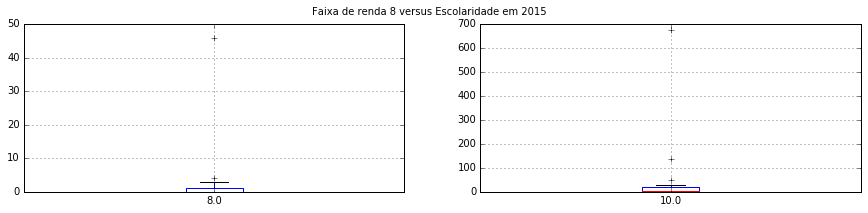

In [394]:
renda8_escolaridade15.plot(kind = 'box',subplots = True, legend = False, figsize = (15, 3), grid = True, title = "Faixa de renda 8 versus Escolaridade em 2015")

3.0        Axes(0.125,0.125;0.227941x0.775)
8.0     Axes(0.398529,0.125;0.227941x0.775)
10.0    Axes(0.672059,0.125;0.227941x0.775)
dtype: object

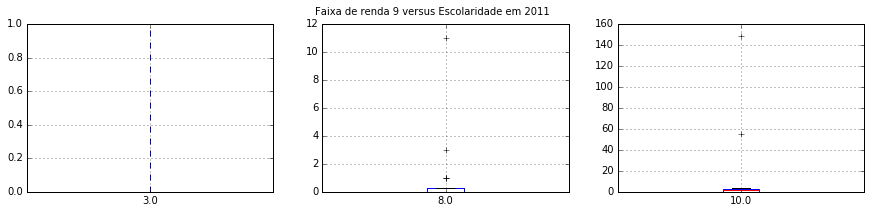

In [395]:
renda9_escolaridade11.plot(kind = 'box',subplots = True, legend = False, figsize = (15, 3), grid = True, title = "Faixa de renda 9 versus Escolaridade em 2011")

8.0        Axes(0.125,0.125;0.352273x0.775)
10.0    Axes(0.547727,0.125;0.352273x0.775)
dtype: object

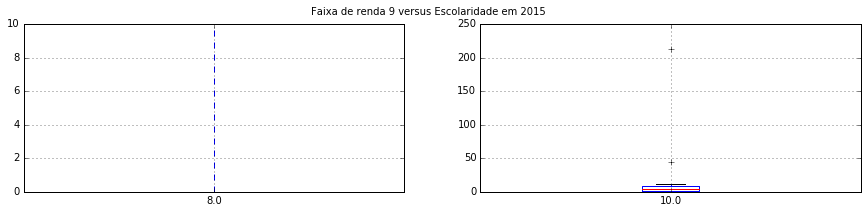

In [396]:
renda9_escolaridade15.plot(kind = 'box',subplots = True, legend = False, figsize = (15, 3), grid = True, title = "Faixa de renda 9 versus Escolaridade em 2015")

8.0        Axes(0.125,0.125;0.352273x0.775)
10.0    Axes(0.547727,0.125;0.352273x0.775)
dtype: object

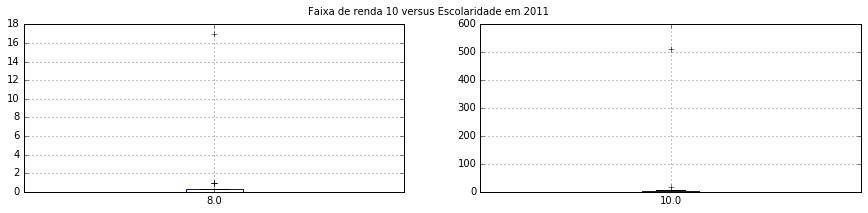

In [397]:
renda10_escolaridade11.plot(kind = 'box',subplots = True, legend = False, figsize = (15, 3), grid = True, title = "Faixa de renda 10 versus Escolaridade em 2011")

6.0        Axes(0.125,0.125;0.227941x0.775)
8.0     Axes(0.398529,0.125;0.227941x0.775)
10.0    Axes(0.672059,0.125;0.227941x0.775)
dtype: object

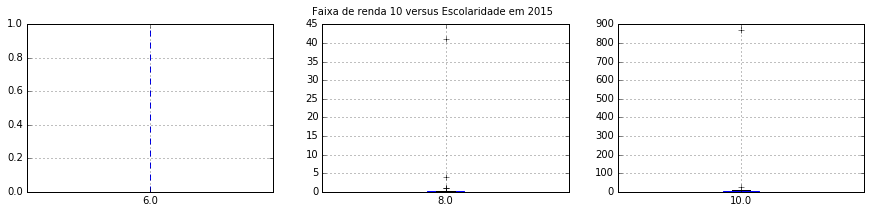

In [398]:
renda10_escolaridade15.plot(kind = 'box',subplots = True, legend = False, figsize = (15, 3), grid = True, title = "Faixa de renda 10 versus Escolaridade em 2015")

3.0        Axes(0.125,0.125;0.168478x0.775)
4.0     Axes(0.327174,0.125;0.168478x0.775)
8.0     Axes(0.529348,0.125;0.168478x0.775)
10.0    Axes(0.731522,0.125;0.168478x0.775)
dtype: object

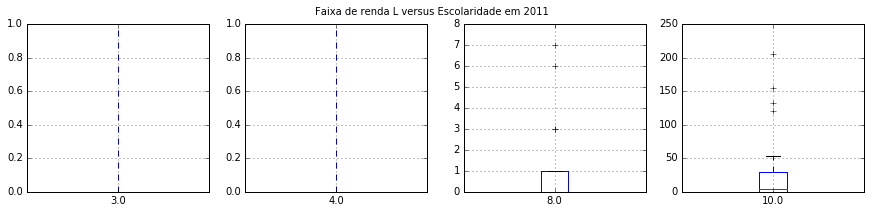

In [399]:
rendaL_escolaridade11.plot(kind = 'box',subplots = True, legend = False, figsize = (15, 3), grid = True, title = "Faixa de renda L versus Escolaridade em 2011")

1.0        Axes(0.125,0.125;0.0731132x0.775)
2.0     Axes(0.212736,0.125;0.0731132x0.775)
3.0     Axes(0.300472,0.125;0.0731132x0.775)
4.0     Axes(0.388208,0.125;0.0731132x0.775)
5.0     Axes(0.475943,0.125;0.0731132x0.775)
6.0     Axes(0.563679,0.125;0.0731132x0.775)
7.0     Axes(0.651415,0.125;0.0731132x0.775)
8.0     Axes(0.739151,0.125;0.0731132x0.775)
10.0    Axes(0.826887,0.125;0.0731132x0.775)
dtype: object

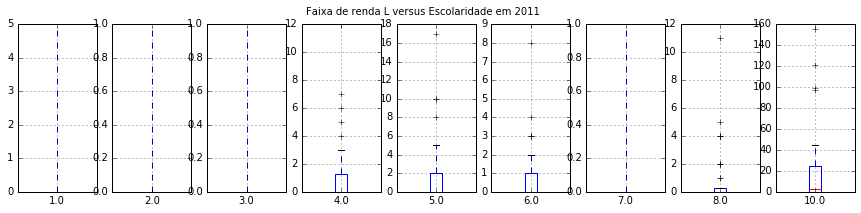

In [400]:
rendaL_escolaridade15.plot(kind = 'box',subplots = True, legend = False, figsize = (15, 3), grid = True, title = "Faixa de renda L versus Escolaridade em 2011")

### Exibição de resultados:

__Como o nível de escolaridade afeta na faixa 1 a 5 de renda?__

In [401]:
c = pd.crosstab(filtro_escolaridade_renda15, filtro_internet_renda15).iloc[:-1, :]
d = pd.crosstab(filtro_escolaridade_renda15, filtro_celular_renda15).iloc[:-1, :]

In [402]:
b = pd.crosstab(filtro_escolaridade_renda11, filtro_internet_renda11).iloc[:-1, :]
a = pd.crosstab(filtro_escolaridade_renda11, filtro_celular_renda11).iloc[:-1, :]

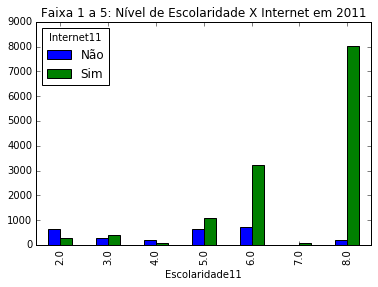

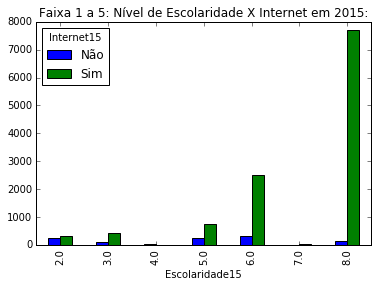

In [403]:
b.plot(kind = "bar")
plt.title("Faixa 1 a 5: Nível de Escolaridade X Internet em 2011")
c.plot(kind = "bar")
plt.title("Faixa 1 a 5: Nível de Escolaridade X Internet em 2015:")

plt.show()

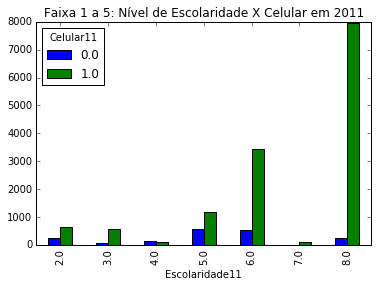

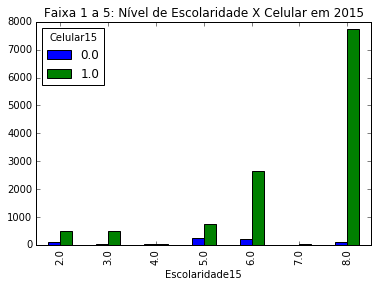

In [404]:
a.plot(kind = "bar")
plt.title("Faixa 1 a 5: Nível de Escolaridade X Celular em 2011")
d.plot(kind = "bar")
plt.title("Faixa 1 a 5: Nível de Escolaridade X Celular em 2015")
plt.show()

__Como o nível de escolaridade afeta na faixa 6 a 10 de renda?__

In [405]:
filtro_celular_renda11 = dados.Celular11.loc[(dados.Renda11 > 5001) & (dados.Renda11 < 10000)]
filtro_celular_renda15 = dados2.Celular15.loc[(dados2.Renda15 > 5001) & (dados.Renda11 < 10000)]

In [406]:
filtro_internet_renda11 = dados.Internet11.loc[(dados.Renda11 > 5000) & (dados.Renda11 < 10000)]
filtro_internet_renda15 = dados2.Internet15.loc[(dados2.Renda15 > 5000) & (dados.Renda11 < 10000)]

In [407]:
filtro_escolaridade_renda11 = dados.Escolaridade11.loc[(dados.Renda11 > 5000) & (dados.Renda11 < 10000)]
filtro_escolaridade_renda15 = dados2.Escolaridade15.loc[(dados2.Renda15 > 5000) & (dados.Renda11 < 10000)]

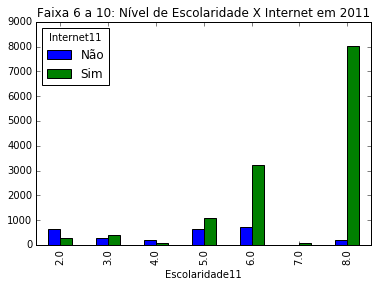

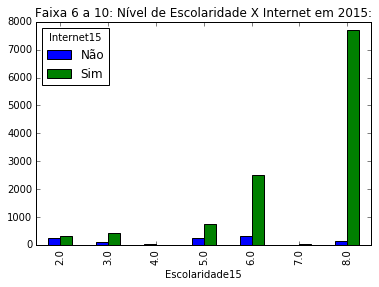

In [408]:
b.plot(kind = "bar")
plt.title("Faixa 6 a 10: Nível de Escolaridade X Internet em 2011")
c.plot(kind = "bar")#, subplots = True)
plt.title("Faixa 6 a 10: Nível de Escolaridade X Internet em 2015:")

plt.show()

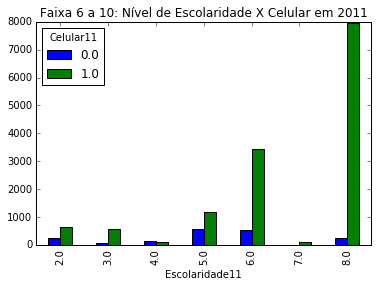

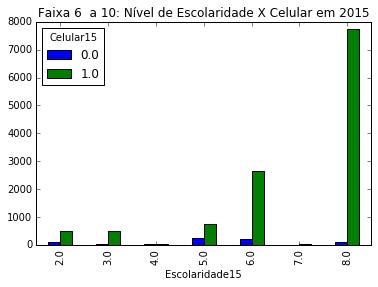

In [409]:
a.plot(kind = "bar")
plt.title("Faixa 6 a 10: Nível de Escolaridade X Celular em 2011")
d.plot(kind = "bar")
plt.title("Faixa 6  a 10: Nível de Escolaridade X Celular em 2015")
plt.show()

# Conclusão: pessoas que têm acesso a pelo menos ensino superior estão sempre conectadas.